### 1) [3pts+1pt]
Poli4x4 is a game played on a 4x4 grid. In Python, a grid can be seen as a matrix with 4 rows and
4 columns and can be represented with a list of lists. Each cell of the grid may take the value 0 or 1. The
content of the cells is generated randomly. Below are three examples of possible grids. Write a Python
function fill_grid that generates and returns the grid. Solutions that employ list comprehension are preferred
[+1pt].


In [45]:
import random

def fill_grid():
    grid=[random.choices([1,0], k=4) for i in range(4)]
    return grid



grid=fill_grid()
print(grid)

[[0, 0, 1, 0], [0, 0, 1, 1], [1, 0, 1, 1], [1, 1, 0, 0]]


### 2) [6pts]
Write a Python function fill_sums dict that computes the sum for all rows and for all the columns of
the grid. The results are stored (as values) in a dictionary where keys identify the row/column number.
For instance, considering the example grid (A), the dictionary entry (‘r’,0): 2 means that the first row of the
grid has sum 2, while (‘c’,2): 4 means that the third column of the grid has sum 4. The function takes the grid
as input, and it returns the complete dictionary built in this way.

In [90]:
def fill_sums_dict(grid):
    diction={('r',i): sum(row) for i, row in enumerate(grid)}
    transposed=[]
    for i in range(len(grid)):
        col=[]
        for row in grid:
            col.append(row[i])
        transposed.append(col)
    dic_col={('c',i): sum(row) for i, row in enumerate(transposed)}
    diction.update(dic_col)
    return diction

fill_sums_dict(grid)


{('r', 0): 1,
 ('r', 1): 1,
 ('r', 2): 3,
 ('r', 3): 2,
 ('c', 0): 1,
 ('c', 1): 3,
 ('c', 2): 1,
 ('c', 3): 2}

### 3) [6pts]
Write the Python code that creates a new grid (i.e., calling the function created in Ex. 1), creates the dictionary of sums (i.e., calling the function created in Ex. 2) [1pt], and then:

a. In a file results.txt, it prints which rows or columns only have zeros or only have ones [2pts]

b. On the console, it prints a barplot with the n. of columns/rows respectively with sum 0, 1, 2, 3, 4 [3pts]

In [71]:
new_grid=fill_grid()
print(new_grid)
new_grid_dictionary=fill_sums_dict(new_grid)
print(new_grid_dictionary)

with open('results.txt', mode='w') as f:
    result=[]
    for key,value in new_grid_dictionary.items():
        if value==0:
            result.append(f'{key} has only zeros')
        elif value==4:
            result.append(f'{key} has only ones')
    #f.writelines(result)    are equivalant
    f.write('\n'.join(result))


[[1, 0, 1, 0], [0, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 0]]
{('r', 0): 2, ('r', 1): 1, ('r', 2): 4, ('r', 3): 2, ('c', 0): 2, ('c', 1): 2, ('c', 2): 3, ('c', 3): 2}


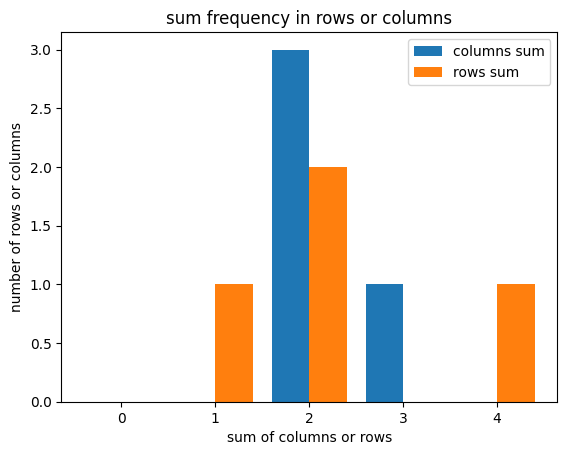

In [144]:
import matplotlib.pyplot as plt

col_data={0:0, 1:0, 2:0 , 3:0, 4:0 }
row_data={0:0, 1:0, 2:0, 3:0, 4:0 }

for ky, vl in new_grid_dictionary.items():
    if ky[0]== 'c':
        col_data[vl]+=1

    elif ky[0]=='r':
        row_data[vl]+=1


xes=list(col_data.keys())
col=[x-0.2 for x in xes]
row=[x+0.2 for x in xes]
plt.bar(col,list(col_data.values()), width=0.4, label='columns sum')
plt.bar(row,list(row_data.values()), width=0.4, label='rows sum')
plt.title('sum frequency in rows or columns')
plt.xlabel('sum of columns or rows')
plt.ylabel('number of rows or columns')
plt.legend()
plt.show()

### [9pts]
Implement the structure of the Poli4x4 class following these indications.
The functions implemented in Ex 1 and 2 (fill_grid and fill_sums_dict) become methods in the class (you can rewrite them if convenient). The
constructor exploits them to fill two attributes: grid and sums_dict [1pt].

Only two kinds of configurations are considered ‘winning’ in Poli4x4:

a. if at least 3 columns or rows (or combination of them) have a sum of 4. Write a method has_three_1series that checks if this condition is
true (see grid (B) for an example) [3pts].

b. if the grid has zeros in the outer frame and ones in the inner square. Write a method is_inner_square that checks if this condition is true
 (see grid (C) for an example). [3pts].

Finally, write a method is_winning that calls has_three_1series and is_inner_square and returns True if any of them returns True. Else, it
raises an appropriate exception (i.e., when no winning configuration has been reached) [2pts].

In [176]:
class NoWinning(Exception):
    pass
class Poli4x4:
    def __init__(self):
        self.grid= self.grid()
        self.sums_dict= self.sums_dict()


    def grid (self):
        return fill_grid()

    def sums_dict(self):
        return fill_sums_dict(self.grid)

    def has_three_1series(self):
        vl=list(self.sums_dict.values())
        count_4= vl.count(4)
        if count_4 >=3:
            return True
        else:
           return False

    def is_inner_square(self):
        table=[]
        for ky, vl in self.sums_dict.items():
            if ky[1] in [0,3]:
                if vl==0:
                    table.append(True)
                else:
                    table.append(False)
            elif ky[1] in [1,2]:
                if vl==2:
                    table.append(True)
                else:
                    table.append(False)
        return all(table)



    def is_winning(self):
        truthy=[self.has_three_1series(), self.is_inner_square()]
        if any(truthy):
            return True
        else:
            raise NoWinning('no winning configuration has been reached!')




In [177]:
game1=Poli4x4()
grid=game1.grid
dict=game1.sums_dict
print(grid)
print(dict)
try:
    game1.is_winning()
except NoWinning as e:
    print(e)


[[0, 0, 1, 1], [0, 0, 1, 0], [0, 1, 1, 0], [0, 1, 1, 1]]
{('r', 0): 2, ('r', 1): 1, ('r', 2): 2, ('r', 3): 3, ('c', 0): 0, ('c', 1): 2, ('c', 2): 4, ('c', 3): 2}
no winning configuration has been reached!


### [3pts]
Suppose that the game is generalized to bigger grids. The new class is called PoliNxN. Discuss, in words, what changes/additions you could
make to the code written for Ex. 4 to allow for this possibility.

In [192]:
class PoliNxN:
    def __init__(self,n):
        self.n=n
        self.name= f'Poli{n}x{n}'
        self.grid= self.grid()
        self.sums_dict= self.sums_dict()

    def __str__(self):
        return f'{self.name}'

    def grid(self):
        grid=[random.choices([1,0], k=self.n) for i in range(self.n)]
        return grid

    def sums_dict(self):
        return fill_sums_dict(self.grid)

    def is_inner_square(self):
        table=[]
        for ky, vl in self.sums_dict.items():
            if ky[1] in [0,self.n-1]:
                if vl==0:
                    table.append(True)
                else:
                    table.append(False)
            else:
                if vl==self.n-2:
                    table.append(True)
                else:
                    table.append(False)
        return all(table)

In [193]:
game2=PoliNxN(5)
print(game2.grid)
print(game2.sums_dict)
game2.is_inner_square()



[[0, 0, 1, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 1, 1, 1], [1, 0, 0, 1, 0]]
{('r', 0): 3, ('r', 1): 4, ('r', 2): 5, ('r', 3): 3, ('r', 4): 2, ('c', 0): 3, ('c', 1): 2, ('c', 2): 3, ('c', 3): 5, ('c', 4): 4}


False